# Lorentzian vs. Gaussian
Use tensorflow.keras to build a simple binary
classifier that can distinguish between
one-dimensional Lorentzians $L(x)$ and Gaussians
$N(x)$ where:
\begin{equation}
    L(x)=\frac{A}{(x-\mu)^2\sigma^2+1}\\
    N(x)=Ae^{-(x-\mu)^2/(2\sigma^2)}
\end{equation}
Here A is the amplitude, $\mu$ the location of the peaks, and $\sigma$ the width. You are free to choose any
values for these you like, but I suggest you start simple.

In [35]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
from tqdm import trange,tqdm
import math

## Part a
Write a function that can generate your dataset. This should include a large number of random
functions $L$ and $N$ on the line -5$\leq x \leq$ 5 where A, $\sigma$, $\mu$ are uniformly distributed random
numbers as seen in the figure. The input values will be either $N(x)$ or $L(x)$ while the targets
are 1 for Gaussian and 0 for Lorentzian.

In [36]:
def dataset(size):
    target=np.zeros([size,4])
    for i in range(size):
        A=np.random.uniform(low=0, high=1.0)
        σ=np.random.uniform(low=0, high=1.0)
        μ=np.random.uniform(low=-3.0, high=3.0)
        choice=np.random.uniform(low=-1.0, high=1.0)
        target[i][0]=A
        target[i][1]=σ
        target[i][2]=μ
        if choice>=0:
            target[i][3]=1
        else:
            target[i][3]=0
    return target

In [37]:
size=10
target=np.zeros([size,4])
target=dataset(size)
print(target)

[[ 0.5592817   0.15539393 -1.02811818  0.        ]
 [ 0.46662473  0.29423112  0.62037167  1.        ]
 [ 0.8227206   0.69146762  0.7718853   0.        ]
 [ 0.11759713  0.84274057  2.58280108  0.        ]
 [ 0.77291638  0.02537092 -1.67835975  1.        ]
 [ 0.68664037  0.34280467 -2.0207461   1.        ]
 [ 0.64728929  0.23674091 -2.87404424  1.        ]
 [ 0.72833707  0.15420754 -0.76194949  1.        ]
 [ 0.0424624   0.50277487  1.19120847  1.        ]
 [ 0.53600729  0.96258482  2.39551696  1.        ]]


(0.0, 1.0)

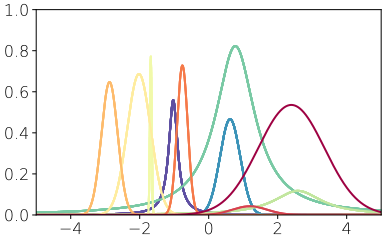

In [38]:
x=np.linspace(-5.0, 5.0, 1000)
y=np.zeros((1000,size))

for i in range(size):
    if target[i][3]==0:
        for j in range(len(x)):
            y[j][i]=target[i][0]/((((x[j]-target[i][2])**2)/(target[i][1]**2))+1)
    else:
        for j in range(len(x)):
            e=(((x[j]-target[i][2])**2)/(2*(target[i][1]**2)))
            y[j][i]=target[i][0]*np.exp(-1*e)
    plt.plot(x,y)
    
plt.xlim([-5,5])
plt.ylim([0,1])

## Part b
Using the binary cross entropy as your cost function, train your network to distinguish between
them. What level of accuracy can you achieve with 10 functions? 100? 1000?

In [39]:
label=target[:,-1].astype(dtype=int)
thing=target[:,:-1].astype(dtype=float)
L=10

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(thing, label, test_size=0.1)

model = keras.Sequential(
[
    layers.Dense(10,input_shape=(3,),activation='relu'),
    layers.Dense(25,input_shape=(3,),activation='relu'),
    layers.Dense(50,input_shape=(3,),activation='relu'),
    layers.Dense(25,input_shape=(3,),activation='relu'),
    layers.Dense(10,input_shape=(3,),activation='relu'),\
    layers.Dense(1, activation='sigmoid', bias_initializer='zeros')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_23 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_24 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_25 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 3,161
Trainable params: 3,161
Non-trainable params: 0
___________________________________________________

In [50]:
np.shape(x_train)

(9, 3)

In [59]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy']) 

In [62]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy']) 
batch_size = 100
epochs = 30
training_history = {}
training_history['test'] = model.fit(x_train,y_train, epochs=epochs,validation_data=(x_test,y_test), verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 890ms/step - loss: 0.6328 - accuracy: 0.7778 - val_loss: 0.8141 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 39ms/step - loss: 0.6236 - accuracy: 0.7778 - val_loss: 0.8311 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 38ms/step - loss: 0.6144 - accuracy: 0.7778 - val_loss: 0.8497 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 38ms/step - loss: 0.6054 - accuracy: 0.7778 - val_loss: 0.8692 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 38ms/step - loss: 0.5963 - accuracy: 0.7778 - val_loss: 0.8894 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 39ms/step - loss: 0.5874 - accuracy: 0.7778 - val_loss: 0.9116 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 0s 38ms/step - loss: 0.5784 - accuracy: 0.7778 - val_loss: 0.9352 - val_accuracy: 0.0000e+0

In [63]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=2)

predictions = np.zeros(thing.shape[0],dtype=int)
predictions[np.where(model(thing)>=0.5)[0]] = 1

mistakes = np.where(label != predictions)[0]
num_mistakes = len(mistakes)

print(f'Num. Mistakes  = {num_mistakes}')

1/1 - 0s - loss: 1.8357 - accuracy: 0.0000e+00
Num. Mistakes  = 3


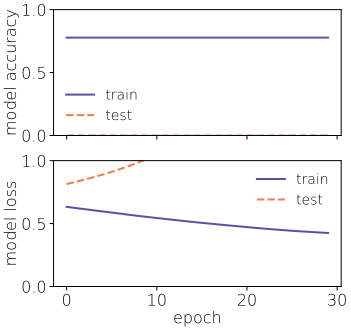

In [64]:
# look into training history
fig,ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(5,5))

# summarize history for accuracy
ax[0].plot(training_history['test'].history['accuracy'])
ax[0].plot(training_history['test'].history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].set_ylim(0,1)

# summarize history for loss
ax[1].plot(training_history['test'].history['loss'])
ax[1].plot(training_history['test'].history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='best');

## Part c
How does the performance of your deep neural network compare to logistic
regression? You can either write your own code to do this, or use some libraries (like
scikit.learn).

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(thing, label, test_size=0.1)

model = keras.Sequential(
[
    layers.Dense(2,input_shape=(3,),activation='relu'),
    layers.Dense(1, activation='sigmoid', bias_initializer='zeros')
])

In [66]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=2)

predictions = np.zeros(thing.shape[0],dtype=int)
predictions[np.where(model(thing)>=0.5)[0]] = 1

mistakes = np.where(label != predictions)[0]
num_mistakes = len(mistakes)

print(f'Num. Mistakes  = {num_mistakes}')

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.